In [1]:
# Importation des librairies.
%autosave 0
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Lecture du fichier.
df = pd.read_csv("df1.csv")
df.head()

Autosave disabled


,Titre,Commentaire,Date_experience,Date_publication,Reponse,Date_reponse,Pays,Verification,Nombre_avis_publie,Note,Entreprise
0,Je commande mes pneus de motos et de voitures,Je commande mes pneus de motos et de voitures ...,2023-07-23,2023-08-05,NaN,NaN,GR,1,1,5,Allopneus
1,"Ne cherchez plus vos pneus, Allopneus le peut","BonjourLe site est génial, très bien expliqué ...",2023-07-13,2023-08-04,NaN,NaN,FR,1,6,5,Allopneus
2,Tout était parfait,"Tout était parfait, timing parfait dans les da...",2023-07-16,2023-08-04,NaN,NaN,FR,1,3,5,Allopneus
3,Pneus d'un tres bon rapport qualité…,Pneus d'un tres bon rapport qualité prix. Les ...,2023-07-24,2023-08-05,NaN,NaN,FR,1,4,5,Allopneus
4,"Bon suivi de la commande,les questions…","Bon suivi de la commande,les questions sont im...",2023-07-23,2023-08-04,NaN,NaN,FR,1,1,4,Allopneus


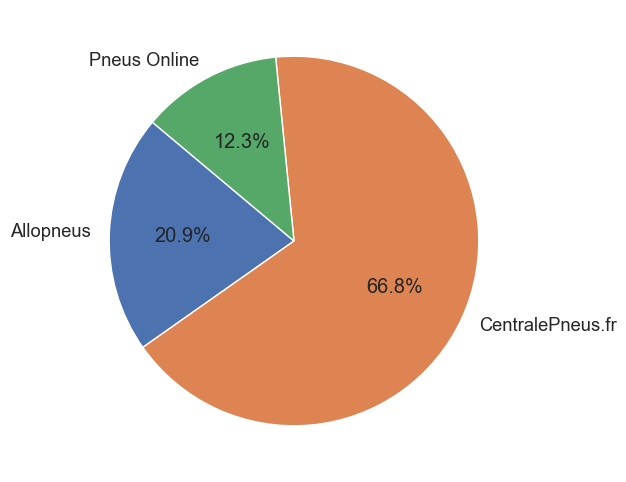

In [2]:
# Répartition des avis collectés par entreprise.
avis_par_entreprise = df.groupby("Entreprise")["Titre"].count().reset_index()
plt.figure(figsize=(8, 6))
sns.set_palette("pastel")  
sns.set(font_scale=1.2)
plt.pie(avis_par_entreprise["Titre"], labels=avis_par_entreprise["Entreprise"], autopct="%1.1f%%", startangle=140)
plt.show()

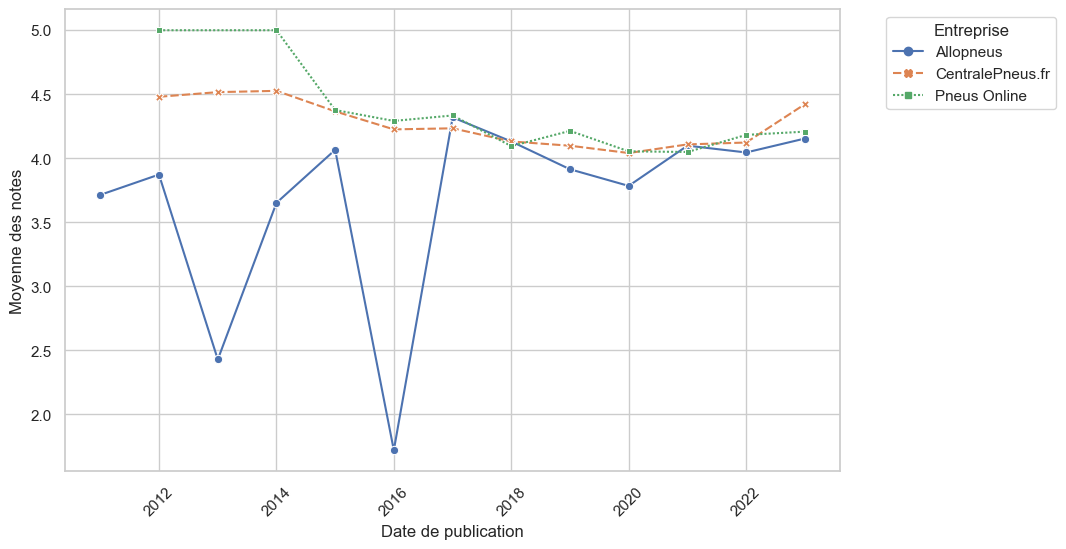

In [3]:
# Evolution de la moyenne des notes dans le temps.
df["Date_publication"] = pd.to_datetime(df["Date_publication"])
df["Annee"] = df["Date_publication"].dt.year
pivot_table = pd.pivot_table(df,values="Note",index=["Annee"], columns="Entreprise", aggfunc="mean")
pivot_table.index = pd.to_datetime(pivot_table.index, format='%Y')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_table, markers=True)
plt.xlabel("Date de publication")
plt.ylabel("Moyenne des notes")
plt.legend(title="Entreprise", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

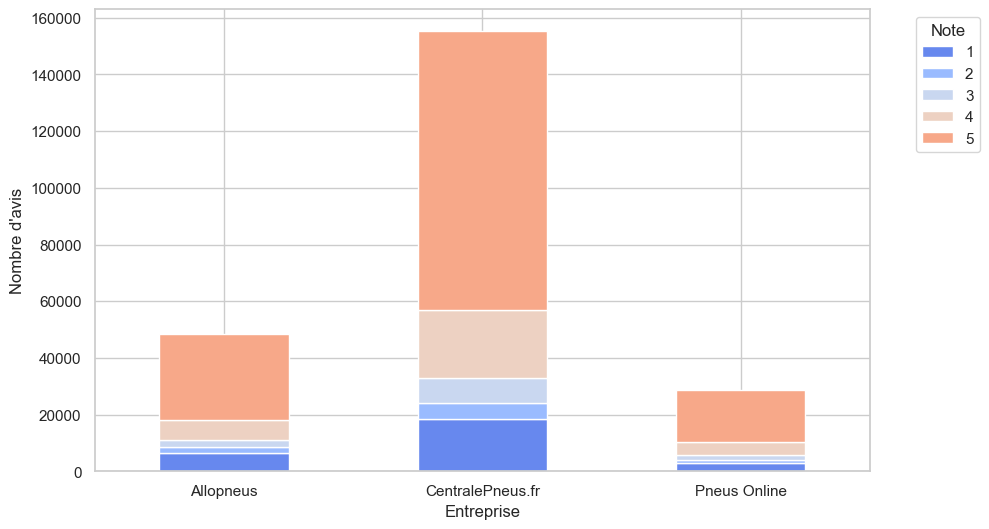

In [4]:
# Répartition des notes par entreprise.
note_counts = df.groupby(["Entreprise","Note"]).size().unstack(fill_value=0)
sns.set_palette("coolwarm")
ax = note_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Entreprise")
plt.ylabel("Nombre d'avis")
plt.legend(title="Note", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)
plt.show()

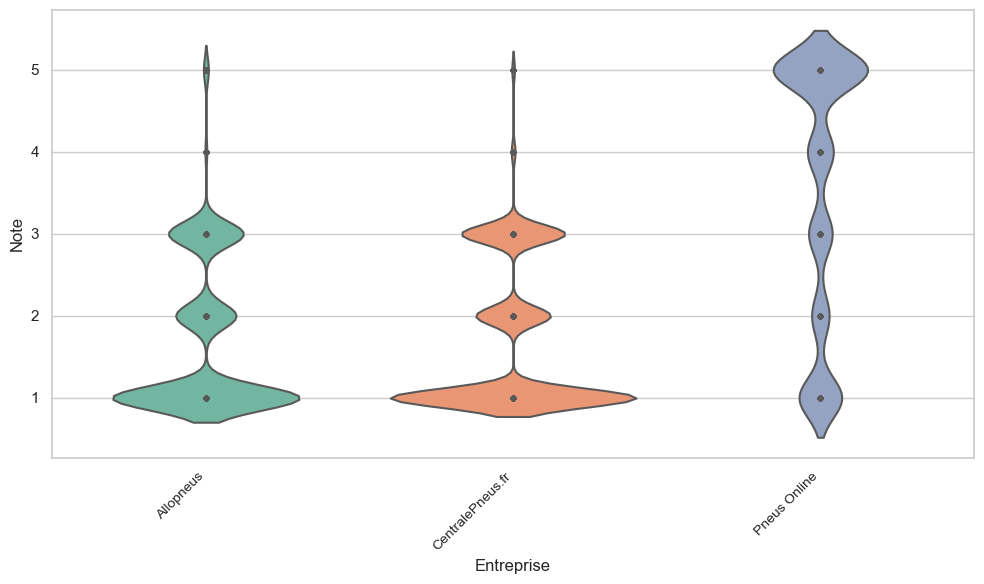

In [5]:
# Répartition des réponses par entreprise.
avis_reponse = df.dropna(subset=["Reponse"])
sns.set_palette("Set2")
plt.figure(figsize=(10, 6))
ax = sns.violinplot(data=avis_reponse, x="Entreprise", y="Note", inner="point")
plt.xlabel("Entreprise")
plt.ylabel("Note")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\Windows\AppData\Local\Temp\ipykernel_16020\1931262489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avis_reponse["Temps_de_reponse"] = (avis_reponse["Date_reponse"] - avis_reponse["Date_publication"]).dt.days


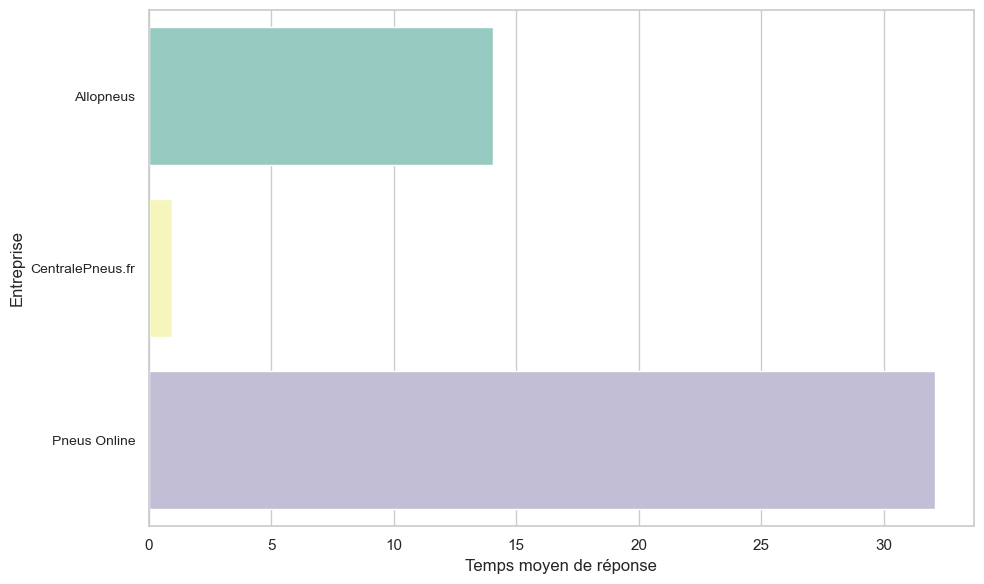

In [6]:
# Répartition du temps moyen de réponse par entreprise.
df["Date_publication"] = pd.to_datetime(df["Date_publication"])
df["Date_reponse"] = pd.to_datetime(df["Date_reponse"])
avis_reponse = df.dropna(subset=["Reponse"])
avis_reponse["Temps_de_reponse"] = (avis_reponse["Date_reponse"] - avis_reponse["Date_publication"]).dt.days
temps_moyen_reponse = avis_reponse.groupby("Entreprise")["Temps_de_reponse"].mean().reset_index()
sns.set_palette('Set3')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=temps_moyen_reponse, y="Entreprise", x="Temps_de_reponse", orient="h")
plt.ylabel("Entreprise")
plt.xlabel("Temps moyen de réponse")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

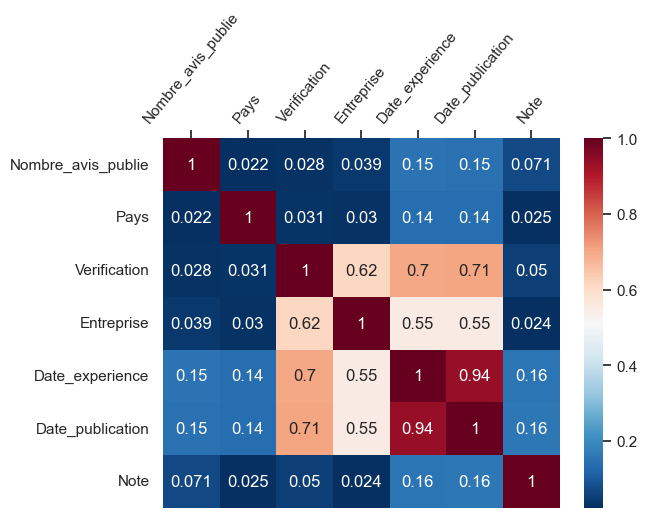

In [7]:
# Corrélation entre Note et les autres variables.  
from scipy.stats import pearsonr, chi2_contingency
import numpy as np
catVar=['Nombre_avis_publie','Pays','Verification','Entreprise','Date_experience','Date_publication','Note']
stat =[]
pval = []
dofs =[]
corr=[]
for col in catVar:
    stat_sub =[]
    pval_sub = []
    dofs_sub =[]
    corr_sub=[]
    for col2 in catVar:
        ct = pd.crosstab(df[col],df[col2])
        conting = chi2_contingency(ct)
        stat_sub.append(conting[0])
        pval_sub.append(conting[1])
        dofs_sub.append(conting[2])
        n=ct.sum().sum()
        corr_sub.append(np.sqrt(conting[0]/(len(df)*(min(ct.shape) - 1))))
    stat.append(stat_sub)
    pval.append(pval_sub)
    dofs.append(dofs_sub)
    corr.append(corr_sub)   
figcorr = sns.heatmap(np.array(corr),annot=True,cmap='RdBu_r')
figcorr.set_xticklabels(catVar)
figcorr.set_yticklabels(catVar)
figcorr.xaxis.tick_top()
plt.xticks(rotation=50)
plt.yticks(rotation=0)
plt.show()

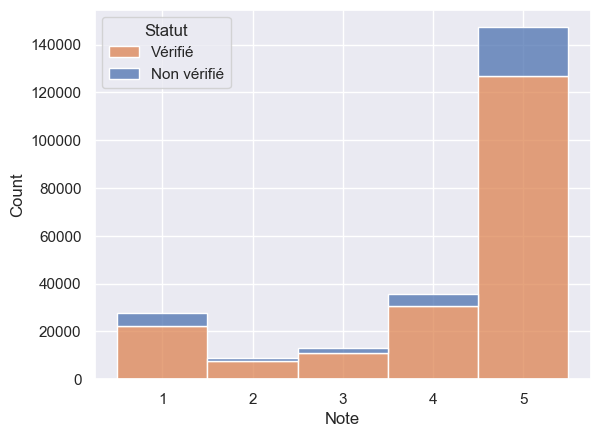

Verification
1    0.852742
0    0.147258
Name: proportion, dtype: float64


In [8]:
# Répartition des notes selon la vérification des commentaires.
sns.set_theme()
fig0 = sns.histplot(data=df,x='Note',hue='Verification', multiple="stack",discrete=True)
plt.legend(title='Statut', loc='upper left', labels=['Vérifié','Non vérifié'])
plt.show()
print(df.Verification.value_counts(normalize=True))

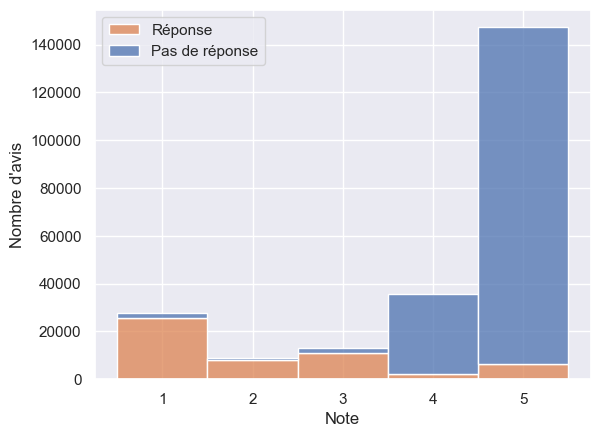

In [9]:
# Répartition des notes selon la présence de réponse aux commentaires.
df['iscommentaire'] = df.Commentaire.notna()
df['isResponse'] = df.Reponse.notna()
fig3 = sns.histplot(data=df,x='Note',hue='isResponse', multiple="stack",discrete=True)
plt.legend(loc='upper left', labels=['Réponse', 'Pas de réponse'])
plt.ylabel("Nombre d'avis")
plt.show()

Outliers Limite bas = -21.5; Outliers Limite haut = 70.5
(70.5, -21.5)
Outliers Limite bas = -21.5; Outliers Limite haut = 70.5


Text(0, 0.5, "Nombre d'avis")

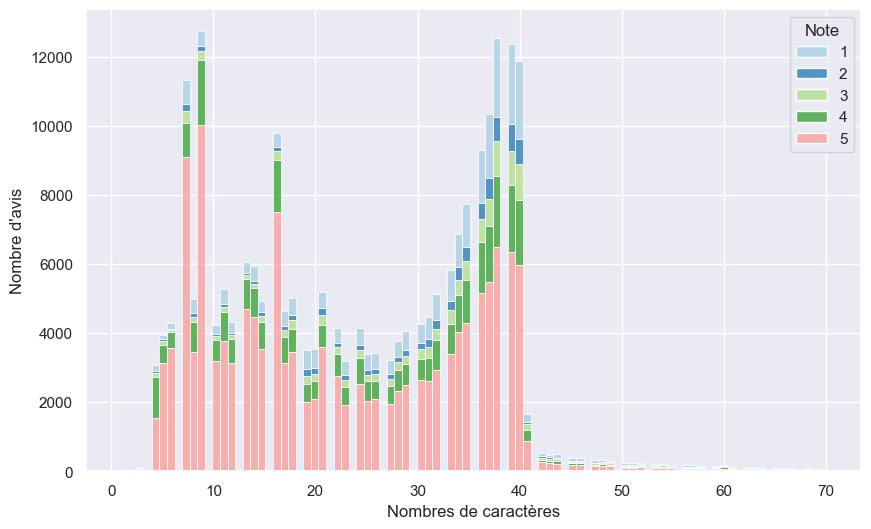

In [10]:
# Répartition des avis en fonction du nombre de caractères dans les titres.
def get_outliers(serie):
    outLimit_p = serie.quantile(.75) + 1.5*(serie.quantile(.75)-serie.quantile(.25));
    outLimit_n = serie.quantile(.25) - 1.5*(serie.quantile(.75)-serie.quantile(.25));
    print(f'Outliers Limite bas = {outLimit_n}; Outliers Limite haut = {outLimit_p}')
    return outLimit_p, outLimit_n
df.Titre = df.Titre.astype('str')
df['longTitre']  = df.Titre.apply(lambda x: len(x))
print(get_outliers(df.longTitre))
outLimit_p,outLimit_n  =get_outliers(df.longTitre)
sns.set_theme()
plt.figure(figsize=(10,6))
fig_titre1 = sns.histplot(palette=sns.color_palette("Paired", 5),data=df[(df.longTitre<outLimit_p) & (df.longTitre>outLimit_n)],x='longTitre',hue='Note',multiple='stack')
fig_titre1.set_xlabel("Nombres de caractères")
fig_titre1.set_ylabel("Nombre d'avis")

Outliers Limite bas = -91.0; Outliers Limite haut = 277.0


Text(25.0, 0.5, "Nombre d'avis")

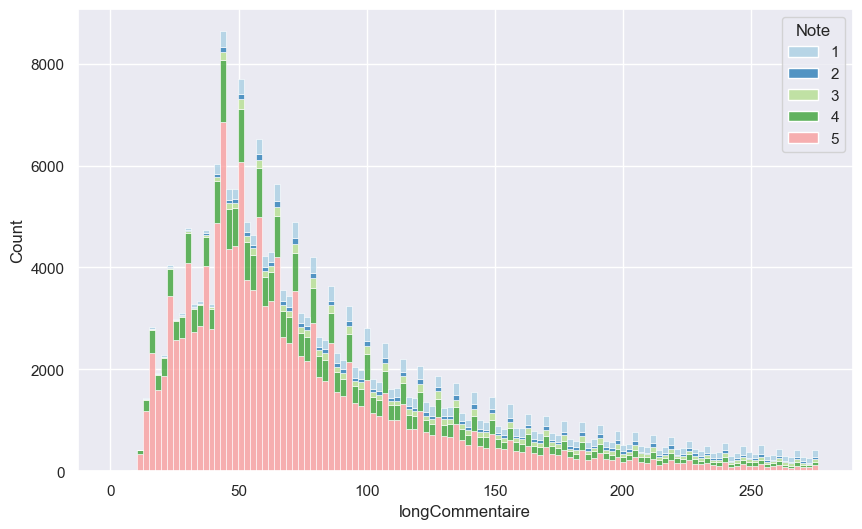

In [11]:
# Répartition des avis en fonction du nombre de caractères dans les commentaires.
df.Commentaire = df.Commentaire.astype('str')
df['longCommentaire']  = df.Commentaire.apply(lambda x: len(x))
outLimit_p,outLimit_n  =get_outliers(df.longCommentaire)
sns.set_theme()
plt.figure(figsize=(10,6))
fig_comment1 = sns.histplot(palette=sns.color_palette('Paired',5),data=df[(df.longCommentaire<outLimit_p) & (df.longCommentaire>outLimit_n)],x='longCommentaire',hue='Note',multiple='stack')
fig_titre1.set_xlabel("Nombres de caractères")
fig_titre1.set_ylabel("Nombre d'avis")

In [12]:
def Count_special(str):
    upper, lower, number, ponctuation, special = 0, 0, 0, 0, 0
    for i in range(len(str)):
        if str[i].isupper():
            upper += 1
        elif str[i].islower():
            lower += 1
        elif str[i].isdigit():
            number += 1
        elif str[i] in ['!','?']:
            ponctuation += 1
        elif str[i] in '@#$%&+=-<>~/\"*(){}[]':
            special += 1  
    return upper,lower,number,ponctuation,special
print(Count_special(df.Titre[0]))
df.head()
df['UpperCount'], _, df['digitCount'], df['PonctCount'],df['SpecialCount'] = zip(*df.Commentaire.apply(lambda x: Count_special(x)))

(1, 36, 0, 0, 0)


Outliers Limite bas = -2.0; Outliers Limite haut = 6.0
Outliers Limite bas = 0.0; Outliers Limite haut = 0.0
Outliers Limite bas = 0.0; Outliers Limite haut = 0.0
Outliers Limite bas = 0.0; Outliers Limite haut = 0.0


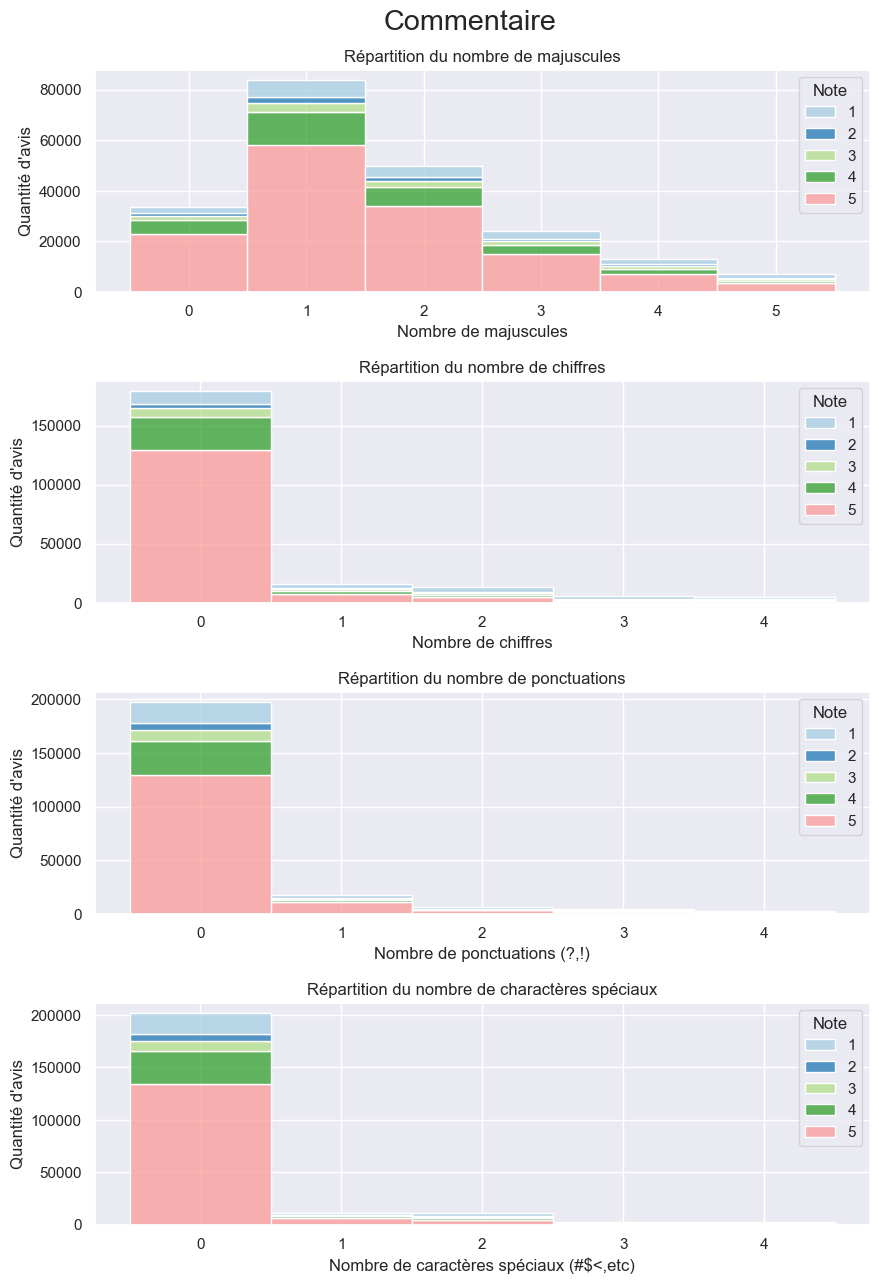

In [13]:
# Analyse des commentaires.
sns.set_theme()
f, (ax1, ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10, 15))
f.suptitle('Commentaire',y=0.92,fontsize='xx-large')
out_p,out_n = get_outliers(df.UpperCount)
fig001 = sns.histplot(data = df[(df.UpperCount<np.maximum(5,out_p))], x='UpperCount',ax=ax1,discrete=True,hue='Note',palette=sns.color_palette("Paired", 5),multiple='stack')
fig001.set(title='Répartition du nombre de majuscules')
fig001.set_xlabel('Nombre de majuscules')
fig001.set_ylabel('Quantité d\'avis')
out_p,out_n = get_outliers(df.digitCount)
fig002 = sns.histplot(data = df[(df.digitCount<np.maximum(5,out_p))], x='digitCount',ax=ax2,discrete=True,hue='Note',palette=sns.color_palette("Paired", 5),multiple='stack')
fig002.set(title='Répartition du nombre de chiffres')
fig002.set_xlabel('Nombre de chiffres')
fig002.set_ylabel('Quantité d\'avis')
out_p,out_n = get_outliers(df.PonctCount)
fig003 = sns.histplot(data = df[(df.PonctCount<np.maximum(5,out_p)) ], x='PonctCount',ax=ax3,discrete=True,hue='Note',palette=sns.color_palette("Paired", 5),multiple='stack')
fig003.set(title='Répartition du nombre de ponctuations')
fig003.set_xlabel('Nombre de ponctuations (?,!)')
fig003.set_ylabel('Quantité d\'avis')
out_p,out_n = get_outliers(df.SpecialCount)
fig004 = sns.histplot(data = df[(df.SpecialCount<np.maximum(5,out_p))], x='SpecialCount',ax=ax4,discrete=True,hue='Note',palette=sns.color_palette("Paired", 5),multiple='stack')
fig004.set(title='Répartition du nombre de charactères spéciaux')
fig004.set_xlabel('Nombre de caractères spéciaux (#$<,etc)')
fig004.set_ylabel('Quantité d\'avis')
f.subplots_adjust(hspace=0.4)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None, ngrame=1,stopWord=True):
    """
    Compte le nombre de recurrences des ngrames presents dans le corpus et retourne le top n ngrames et leur decomptes.
    :param corpus: Serie, incluant 1 seul colonne de string
    :param n: int, Nombre de Ngrame a collecter apres triage
    :param ngrame: int, ordre du Ngrame vise. 1 mot = 1grame, couple mots se suivant = 2grame, etc
    :param stopWord: Boolean, filtre les stopWord present dans les string. La list de stop word est definie dans la
    fonction. StopWord example = le,la,les,de,je,etc
    :return: List of tuple, [(mot,nombre recense)]
    """
    items = {"ä": "a", "ç": "c", "è": "e", "º": "", "Ã": "A", "Í": "I", "í": "i", "Ü": "U", "â": "a", "ò": "o", "¿": "",
             "ó": "o", "á": "a", "à": "a", "õ": "o", "¡": "", "Ó": "O", "ù": "u", "Ú": "U", "´": "", "Ñ": "N", "Ò": "O",
             "ï": "i", "Ï": "I", "Ç": "C", "À": "A", "É": "E", "ë": "e", "Á": "A", "ã": "a", "Ö": "O", "ú": "u",
             "ñ": "n", "é": "e", "ê": "e", "·": "-", "ª": "a", "°": "", "ü": "u", "ô": "o","+":"plus","-":"moins","_":" "}
    stopWordFrench = ['alors','au','ai','aucuns','aussi','autre','avant','avec','avoir','bon','car','ce','cela',
                      'ces','ceux','chaque','ci','comme','comment','dans','de','des','du','dedans','dehors','depuis',
                      'devrait','doit','donc','dos','debut','elle','elles','en','encore','essai','est','et','eu',
                      'fait','faites','fois','font','hors','ici','il','ils','je','juste','la','le','les','leur','ma',
                      'maintenant','mais','mes','mien','moins','mon','mot','meme','ni','nommes','notre','nous','ou',
                      'par','parce','peut','plupart','pour','pourquoi','quand','que','quel','quelle','quelles',
                      'quels','qui','sa','sans','ses','seulement','si','sien','son','sont','sous','soyez','sujet',
                      'sur','ta','un','une','tandis','tellement','tels','tes','ton','tous','tout','tres','tu',
                      'voient','vont','votre','vous','vu','ca','etaient','etat','etions','ete','etre','me','chez',
                      'on','ont',"de_","et_","la_","le_","j_ai","j_"]
    stopWord = stopWordFrench if stopWord else None
    corpus = corpus.str.replace(r'[^\x00-\x7F]', lambda x: items.get(x.group(0)) or '_', regex=True)
    vec = CountVectorizer(ngram_range=(ngrame, ngrame), stop_words=stopWord).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

C:\Users\Windows\AppData\Local\Temp\ipykernel_16020\4131253542.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Windows\AppData\Local\Temp\ipykernel_16020\4131253542.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Windows\AppData\Local\Temp\ipykernel_16020\4131253542.py:39: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


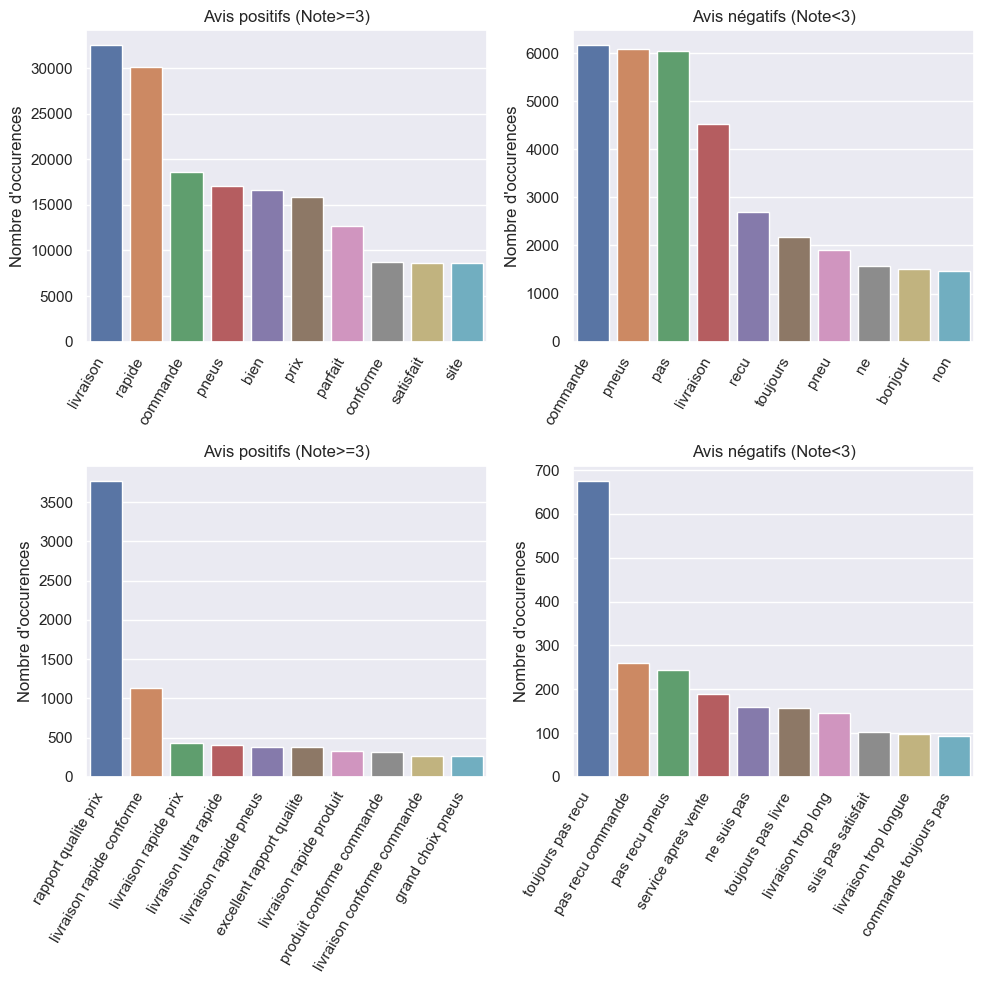

In [15]:
# Top 10 des mots/trigrammes dans les titres les plus présents.
common_words = get_top_ngram(df.loc[df.Note<3]['Commentaire'].dropna().astype(str), n=5,ngrame=1,stopWord=True)
textCloud=''
for word, freq in common_words:
    textCloud += ' ' + word 
df_commonWord = pd.DataFrame(common_words,columns=['mots','count'])
sns.set_theme()
ngrameNB=1
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10, 10))
common_words1 = get_top_ngram(df.loc[df.Note>=3]['Titre'].dropna().astype(str), n=10,ngrame=ngrameNB,stopWord=True)
df_commonWord1 = pd.DataFrame(common_words1,columns=['mots','count'])
fig4=sns.barplot(data = df_commonWord1,x='mots',y='count',ax=ax1)
fig4.set_xticklabels(fig4.get_xticklabels(),rotation=60,ha="right")
plt.tight_layout()
fig4.set(title='Avis positifs (Note>=3)')
ax1.set_ylabel('Nombre d\'occurences')
ax1.set(xlabel=None)
common_words2 = get_top_ngram(df.loc[df.Note<3]['Titre'].dropna().astype(str), n=10,ngrame=ngrameNB,stopWord=True)
df_commonWord2 = pd.DataFrame(common_words2,columns=['mots','count'])
fig41=sns.barplot(data = df_commonWord2,x='mots',y='count',ax=ax2)
fig41.set_xticklabels(fig41.get_xticklabels(),rotation=60,ha="right")
plt.tight_layout()
fig41.set(title='Avis négatifs (Note<3)')
ax2.set_ylabel('Nombre d\'occurences')
ax2.set(xlabel=None)
ngrameNB=3
common_words3 = get_top_ngram(df.loc[df.Note>=3]['Titre'].dropna().astype(str), n=10,ngrame=ngrameNB,stopWord=True)
df_commonWord3 = pd.DataFrame(common_words3,columns=['mots','count'])
fig42=sns.barplot(data = df_commonWord3,x='mots',y='count',ax=ax3)
fig42.set_xticklabels(fig42.get_xticklabels(),rotation=60,ha="right")
plt.tight_layout()
fig42.set(title='Avis positifs (Note>=3)')
ax3.set_ylabel('Nombre d\'occurences')
ax3.set(xlabel=None)
common_words4 = get_top_ngram(df.loc[df.Note<3]['Titre'].dropna().astype(str), n=10,ngrame=ngrameNB,stopWord=True)
df_commonWord4 = pd.DataFrame(common_words4,columns=['mots','count'])
fig43=sns.barplot(data = df_commonWord4,x='mots',y='count',ax=ax4)
fig43.set_xticklabels(fig43.get_xticklabels(),rotation=60,ha="right")
plt.tight_layout()
fig43.set(title='Avis négatifs (Note<3)')
ax4.set_ylabel('Nombre d\'occurences')
ax4.set(xlabel=None)
plt.show()

pas 38666
pneus 31805
commande 25027
ne 17937
livraison 14559


C:\Users\Windows\AppData\Local\Temp\ipykernel_16020\1440276402.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Windows\AppData\Local\Temp\ipykernel_16020\1440276402.py:32: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Windows\AppData\Local\Temp\ipykernel_16020\1440276402.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


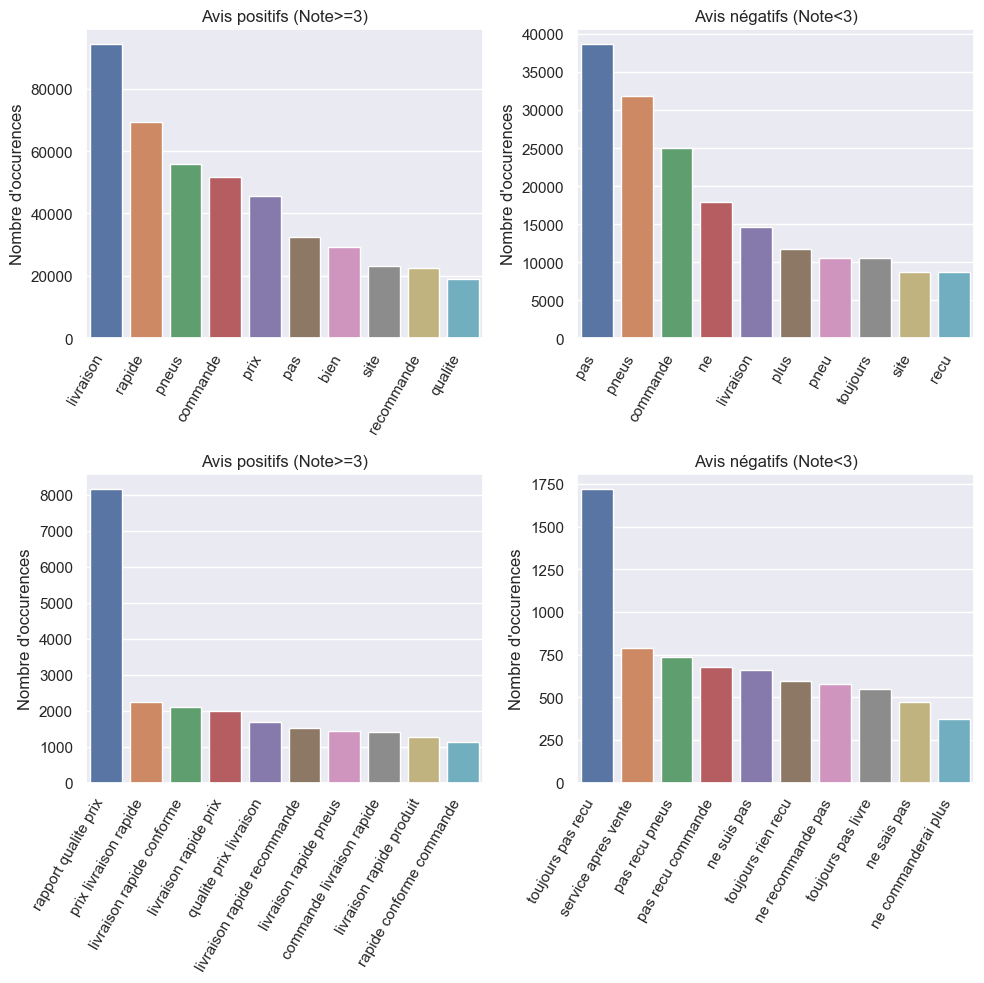

In [16]:
# Top 10 des mots/trigrammes dans les commentaires les plus présents.
common_words = get_top_ngram(df.loc[df.Note<3]['Commentaire'].dropna().astype(str), n=5,ngrame=1,stopWord=True)
textCloud=''
for word, freq in common_words:
    textCloud += ' ' + word 
    print(word, freq) 
df_commonWord = pd.DataFrame(common_words,columns=['mots','count'])
sns.set_theme()
ngrameNB=1
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10, 10))
common_words1 = get_top_ngram(df.loc[df.Note>=3]['Commentaire'].dropna().astype(str), n=10,ngrame=ngrameNB,stopWord=True)
df_commonWord1 = pd.DataFrame(common_words1,columns=['mots','count'])
fig4=sns.barplot(data = df_commonWord1,x='mots',y='count',ax=ax1)
fig4.set_xticklabels(fig4.get_xticklabels(),rotation=60,ha="right")
plt.tight_layout()
fig4.set(title='Avis positifs (Note>=3)')
ax1.set_ylabel('Nombre d\'occurences')#.ylabel('Nombre d\'occurences')
ax1.set(xlabel=None)
common_words2 = get_top_ngram(df.loc[df.Note<3]['Commentaire'].dropna().astype(str), n=10,ngrame=ngrameNB,stopWord=True)
df_commonWord2 = pd.DataFrame(common_words2,columns=['mots','count'])
fig41=sns.barplot(data = df_commonWord2,x='mots',y='count',ax=ax2)
fig41.set_xticklabels(fig41.get_xticklabels(),rotation=60,ha="right")
plt.tight_layout()
fig41.set(title='Avis négatifs (Note<3)')
ax2.set_ylabel('Nombre d\'occurences')#plt.ylabel('Nombre d\'occurences')
ax2.set(xlabel=None)
ngrameNB=3
common_words3 = get_top_ngram(df.loc[df.Note>=3]['Commentaire'].dropna().astype(str), n=10,ngrame=ngrameNB,stopWord=True)
df_commonWord3 = pd.DataFrame(common_words3,columns=['mots','count'])
fig42=sns.barplot(data = df_commonWord3,x='mots',y='count',ax=ax3)
fig42.set_xticklabels(fig42.get_xticklabels(),rotation=60,ha="right")
plt.tight_layout()
fig42.set(title='Avis positifs (Note>=3)')
ax3.set_ylabel('Nombre d\'occurences')
ax3.set(xlabel=None)
common_words4 = get_top_ngram(df.loc[df.Note<3]['Commentaire'].dropna().astype(str), n=10,ngrame=ngrameNB,stopWord=True)
df_commonWord4 = pd.DataFrame(common_words4,columns=['mots','count'])
fig43=sns.barplot(data = df_commonWord4,x='mots',y='count',ax=ax4)
fig43.set_xticklabels(fig43.get_xticklabels(),rotation=60,ha="right")
plt.tight_layout()
fig43.set(title='Avis négatifs (Note<3)')
ax4.set_ylabel('Nombre d\'occurences')
ax4.set(xlabel=None)
plt.show()